#***Machine Learning Classification With PyTorch***

Classification is a problem of predicting wheather something is one thing or another (*There can be multiple things as the Options*)

***What are we going to cover:-***
* Arcitecture of Nural Network
* input shapes and output shapes of classification model
* Creating custom data to view , fit on predict on
* Steps in Modeling
  * creating model, setting loss function and Optimizer, creating training loop , evaluating model.
* Saving and loading model
* Harnessing the power of non-linearity


In [23]:
import torch
import sklearn

# Make classification Data and get it ready

In [24]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                  noise = 0.03,
                  random_state = 42)

In [25]:
print(f"First 5 samples of x : {x[:5]}")
print(f"First 5 samples of y : {y[:5]}")

First 5 samples of x : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : [1 1 1 1 0]


In [26]:
# make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"x1":x[:,0],
                       "x2":x[:,1],
                       "label":y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


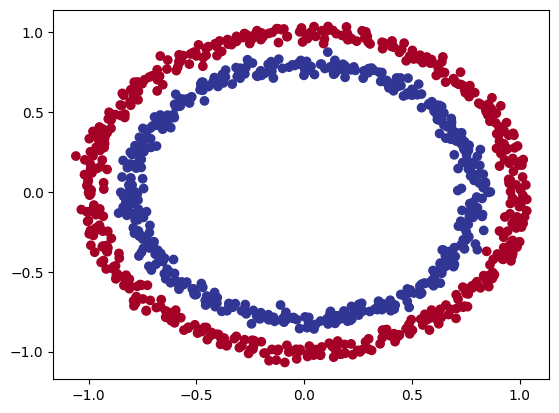

In [27]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(x=circles["x1"],
           y=circles["x2"],
           c=y,
           cmap = plt.cm.RdYlBu)

1.1 Cheak input and output shape


In [28]:
x.shape , y.shape

((1000, 2), (1000,))

In [29]:
# view the first sample o features and labels
x_sample = x[0]
y_sample = y[0]
print(f"sample of x : {x_sample}")
print(f"sample of y : {y_sample}")


sample of x : [0.75424625 0.23148074]
sample of y : 1


1.2 Turn data into tensors and create train test split

In [30]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5],y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [31]:
# split data into train and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)

In [32]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model
1. setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a mosel
3. Define Loss function and optimizer
4. create training and testing loop


In [33]:
import torch
from torch import nn

# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
x_train.to(device)
x_test.to(device)
y_train.to(device)
y_test.to(device)

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')

In [35]:
# replicating the model using nn.sequensial

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=1),
    # nn.Sigmoid()
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997]], device='cuda:0')),
             ('1.bias', tensor([0.0850], device='cuda:0'))])

In [37]:
# make prediction
with torch.inference_mode():
  untraind_pred = model_0(x_test.to(device))
untraind_pred[:10]

tensor([[-0.1566],
        [ 0.0115],
        [-0.3692],
        [-0.0972],
        [-0.0075],
        [ 0.0922],
        [ 0.2788],
        [ 0.2986],
        [-0.3842],
        [ 0.0268]], device='cuda:0')

## 2.1 Setup loss function and optimizer

In [38]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [39]:
# Calculate Accuracyf
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

# 3. Training a Model
1. Forword pass
2. calculate the loss
3. optimizer zero gred
4. Loss backwords (backpropogation)
5. Optimizer step (Gradient decent)

###3.1 Going from raw logits -> prediction Probabilities -> Prediction Labels

***Logits:** thease are the raw output of our model without being passed to a Activation Function


our model outputs are going to be raw **logits**

we can convert thease **logits** into prediction probabilities by passing them to soe kind of activation function (e.g. sigmoid for binary cross entropy and softmax for multiclass classification ).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the
`argmax()`

In [40]:
# view the first 5 o/p of the forword pass on the test data
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.1566],
        [ 0.0115],
        [-0.3692],
        [-0.0972],
        [-0.0075]], device='cuda:0')

### Use the sigmoid activation function
turn model logits into probabilities

For prediction probability values we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5 , y =1  (Class1)
* `y_pred_probs` < 0.5 , y = 0 (class2)

In [41]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4609],
        [0.5029],
        [0.4087],
        [0.4757],
        [0.4981]], device='cuda:0')

In [42]:
#find predected labels

y_pred = torch.round(y_pred_probs)

# in full

y_pred_labels  = torch.round(torch.sigmoid(model_0(x_test.to(device))[0:5]))

# cheak for equality'

print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimention

y_pred.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 0., 0.], device='cuda:0')

# *Build a training and test loop*


In [43]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
 # 1 training

  model_0.train()

  #2 forword pass

  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #3 calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #4 Optimizer zero gred

  optimizer.zero_grad()

  #5 Loss backwords

  loss.backward()

  #6 Optimizer step

  optimizer.step()

  ### Testing loop

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)



  if epoch%10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}%")


Epoch : 0 | Loss : 0.69989 | Accuracy : 48.38% | Test Loss : 0.70629 | Test Accuracy : 49.00%
Epoch : 10 | Loss : 0.69654 | Accuracy : 49.88% | Test Loss : 0.70242 | Test Accuracy : 49.00%
Epoch : 20 | Loss : 0.69515 | Accuracy : 50.38% | Test Loss : 0.70045 | Test Accuracy : 48.50%
Epoch : 30 | Loss : 0.69440 | Accuracy : 50.62% | Test Loss : 0.69918 | Test Accuracy : 48.50%
Epoch : 40 | Loss : 0.69394 | Accuracy : 51.00% | Test Loss : 0.69827 | Test Accuracy : 47.50%
Epoch : 50 | Loss : 0.69363 | Accuracy : 50.88% | Test Loss : 0.69758 | Test Accuracy : 47.50%
Epoch : 60 | Loss : 0.69343 | Accuracy : 51.12% | Test Loss : 0.69705 | Test Accuracy : 47.00%
Epoch : 70 | Loss : 0.69329 | Accuracy : 51.00% | Test Loss : 0.69664 | Test Accuracy : 47.50%
Epoch : 80 | Loss : 0.69320 | Accuracy : 51.25% | Test Loss : 0.69630 | Test Accuracy : 47.50%
Epoch : 90 | Loss : 0.69313 | Accuracy : 51.12% | Test Loss : 0.69604 | Test Accuracy : 47.00%


As our model is not learning too much we plot the model and see why it is not learning.
for this we can make a helper funtion or we can get it from others repo in this case we are making our own

In [44]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

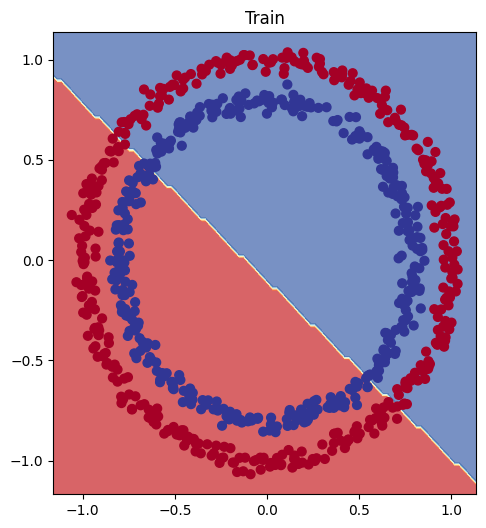

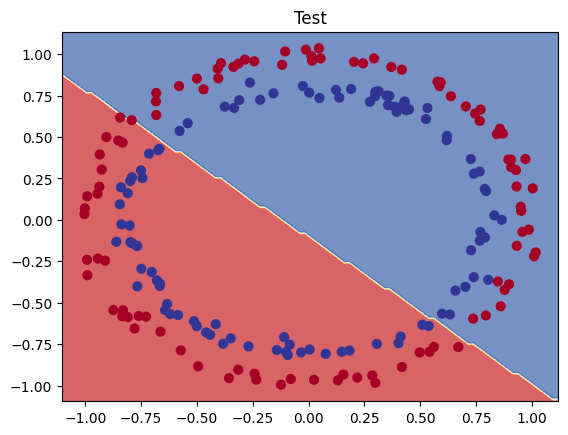

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train,y_train)
plt.show()
plt.title("Test")
plot_decision_boundary(model_0,x_test,y_test)
plt.show()

As we can see our data is circuler but our model is trying to saprate the data with an straight line so we need to improve the model

## ***Improving the Model***


---

* **Add more layers:** Give the model chasces to learn about the data
* **ADD more Hidden unnits:** Go from 5 hidden units to 10 hidden units
* **Fit for longer**
* **Changing the Activation Function**
* **Change the learning rate**
* **Change the loss function**


In [46]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
loss_fn1 = nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 1000
for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred probabilities ->predictions

  loss = loss_fn1(y_logits,
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer1.zero_grad()

  loss.backward()

  optimizer1.step()


  ## testing
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/ accuracy
    test_loss = loss_fn1(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


    if epoch%100==0:
      print(f"Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}%")



Epoch : 0 | Loss : 0.69396 | Accuracy : 50.88% | Test Loss : 0.69261 | Test Accuracy : 51.00%
Epoch : 100 | Loss : 0.69305 | Accuracy : 50.38% | Test Loss : 0.69379 | Test Accuracy : 48.00%
Epoch : 200 | Loss : 0.69299 | Accuracy : 51.12% | Test Loss : 0.69437 | Test Accuracy : 46.00%
Epoch : 300 | Loss : 0.69298 | Accuracy : 51.62% | Test Loss : 0.69458 | Test Accuracy : 45.00%
Epoch : 400 | Loss : 0.69298 | Accuracy : 51.12% | Test Loss : 0.69465 | Test Accuracy : 46.00%
Epoch : 500 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69467 | Test Accuracy : 46.00%
Epoch : 600 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 700 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 800 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 900 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test Accuracy : 46.00%


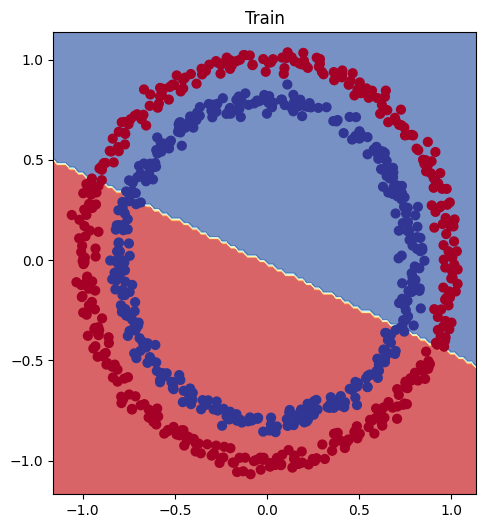

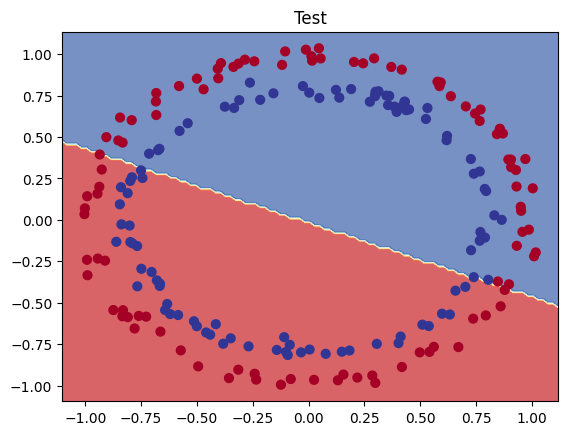

In [49]:
# plot the dicision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.show()
plt.title("Test")
plot_decision_boundary(model_1,x_test,y_test)
plt.show()

In [50]:
# create some data like 1st notebook

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create a data


x_reg = torch.arange(start,end,step).unsqueeze(dim=1)
y_reg = weight * x_reg + bias

# cheak the data

print(len(x_reg))
print(len(y_reg))

100
100


In [51]:
train_split = int(0.8 * len(x_reg))
x_train_reg = x_reg[:train_split]
y_train_reg = y_reg[:train_split]
x_test_reg = x_reg[train_split:]
y_test_reg = y_reg[train_split:]

In [52]:
print(len(x_train_reg))
print(len(y_train_reg))

80
80


In [53]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Move data to CPU before plotting
    train_data = train_data.cpu()
    train_labels = train_labels.cpu()
    test_data = test_data.cpu()
    test_labels = test_labels.cpu()

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Move predictions to CPU
        predictions = predictions.cpu()
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

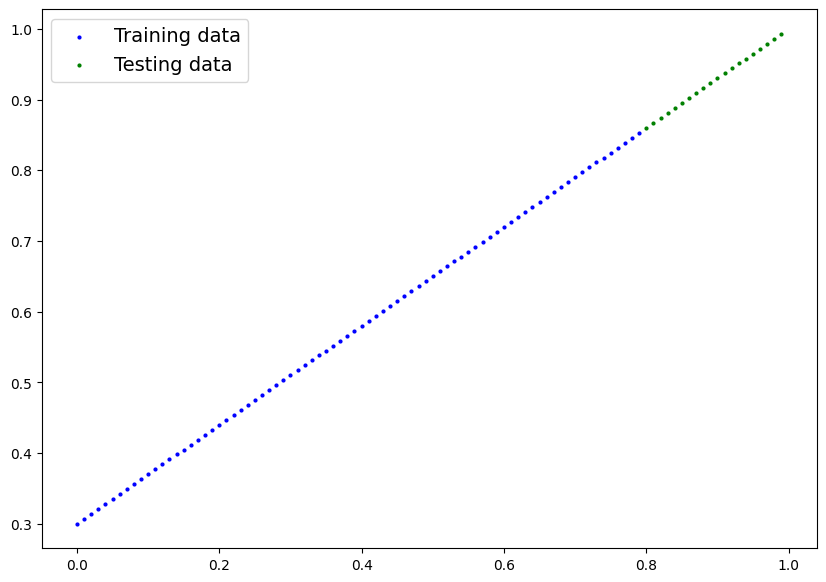

In [54]:
plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg
                 )

In [55]:
# Adjusting model_1 for liner data

model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [56]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.001)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

x_train_reg = x_train_reg.to(device)
x_test_reg = x_test_reg.to(device)
y_train_reg = y_train_reg.to(device)
y_test_reg = y_test_reg.to(device)
for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(x_train_reg)

  loss = loss_fn(y_pred,
                  y_train_reg)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## testing
  model_2.eval()
  with torch.inference_mode():
    # Forward pass
    test_pred = model_2(x_test_reg)

    # calculate test loss/ accuracy
    test_loss = loss_fn(test_pred,y_test_reg)


    if epoch%100==0:
      print(f"Epoch : {epoch} | Loss : {loss:.5f} | Test Loss : {test_loss:.5f}")

Epoch : 0 | Loss : 0.75986 | Test Loss : 0.94965
Epoch : 100 | Loss : 0.40272 | Test Loss : 0.54029
Epoch : 200 | Loss : 0.05876 | Test Loss : 0.13480
Epoch : 300 | Loss : 0.01461 | Test Loss : 0.03342
Epoch : 400 | Loss : 0.00308 | Test Loss : 0.00008
Epoch : 500 | Loss : 0.00309 | Test Loss : 0.00012
Epoch : 600 | Loss : 0.00309 | Test Loss : 0.00018
Epoch : 700 | Loss : 0.00299 | Test Loss : 0.00011
Epoch : 800 | Loss : 0.00299 | Test Loss : 0.00016
Epoch : 900 | Loss : 0.00289 | Test Loss : 0.00011


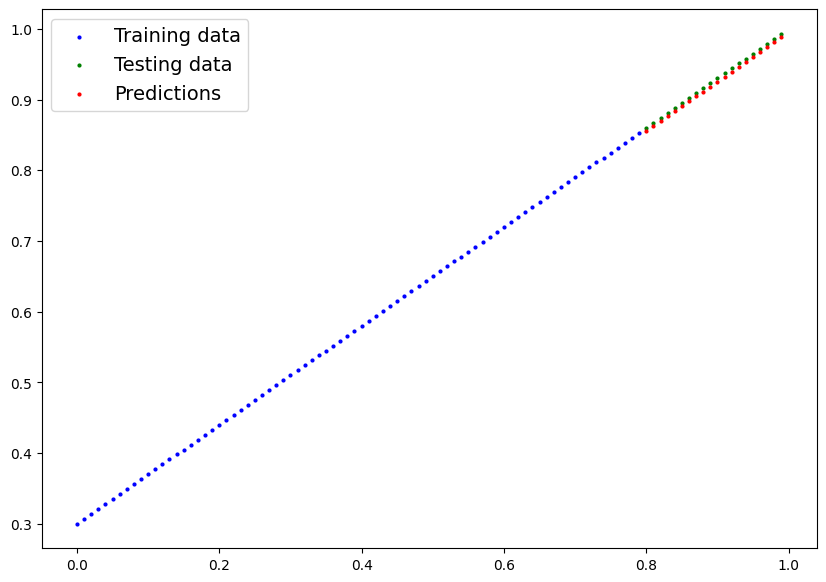

In [57]:
# turn on eval mode
model_2.eval()

#making predictions
with torch.inference_mode():
  y_preds = model_2(x_test_reg)


plot_predictions(train_data=x_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=x_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

# As we can see the problem is that our data is non leniarly saprable but we are trying to saparate it with linearr model

1. Recreating non lenier data


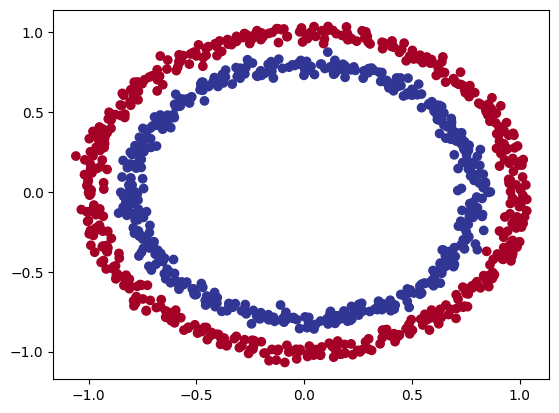

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,noise = 0.03, random_state=42)

plt.scatter(x[:,0],x[:,1],c = y,cmap=plt.cm.RdYlBu)

In [59]:
# convert data to tensors and perform train test split

from torch import nn
from sklearn.model_selection import train_test_split

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [60]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [61]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [62]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 1000

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                  y_train)

  # The typo was here, it should be y_true not y_ture
  acc = accuracy_fn(y_true = y_train , y_pred = y_pred)

  optimizer.zero_grad() # you need to call this function, it is not an attribute of optimizer class

  loss.backward()

  optimizer.step()

  ## testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred = test_pred)


  if epoch%100 == 0:
    print(f"epoch: {epoch} | loss: {loss:.4f} | accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test accuracy {test_acc:.2f}%")

epoch: 0 | loss: 0.6929 | accuracy: 50.00% | Test Loss: 0.6932 | Test accuracy 50.00%
epoch: 100 | loss: 0.6912 | accuracy: 52.88% | Test Loss: 0.6910 | Test accuracy 52.50%
epoch: 200 | loss: 0.6898 | accuracy: 53.37% | Test Loss: 0.6894 | Test accuracy 55.00%
epoch: 300 | loss: 0.6879 | accuracy: 53.00% | Test Loss: 0.6872 | Test accuracy 56.00%
epoch: 400 | loss: 0.6852 | accuracy: 52.75% | Test Loss: 0.6841 | Test accuracy 56.50%
epoch: 500 | loss: 0.6810 | accuracy: 52.75% | Test Loss: 0.6794 | Test accuracy 56.50%
epoch: 600 | loss: 0.6751 | accuracy: 54.50% | Test Loss: 0.6729 | Test accuracy 56.00%
epoch: 700 | loss: 0.6666 | accuracy: 58.38% | Test Loss: 0.6632 | Test accuracy 59.00%
epoch: 800 | loss: 0.6516 | accuracy: 64.00% | Test Loss: 0.6476 | Test accuracy 67.50%
epoch: 900 | loss: 0.6236 | accuracy: 74.00% | Test Loss: 0.6215 | Test accuracy 79.00%


### ***Evaluating them model with non liner activation fn***

In [63]:

# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

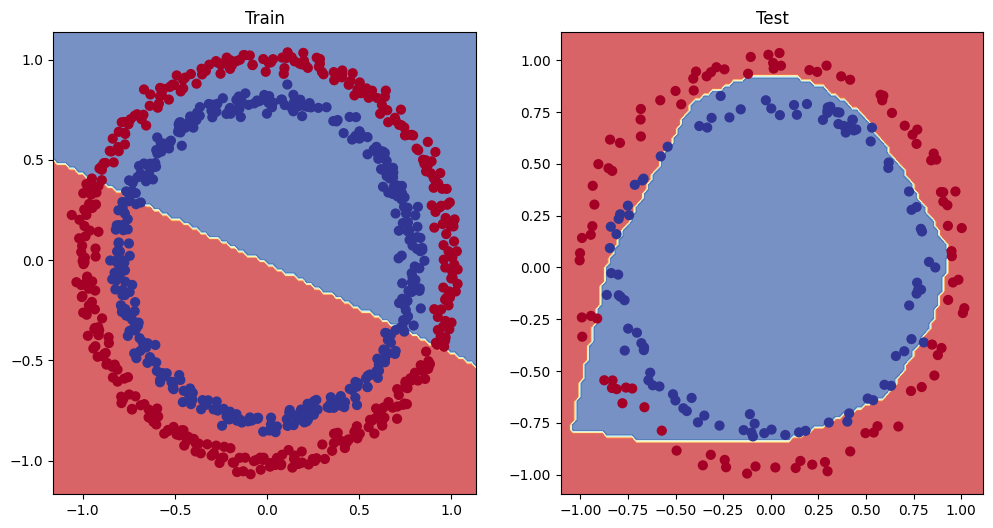

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test) # model_3 = has non-linearity

# Replicating non leniar activaton function

In [65]:
A = torch.arange(-10,10,1, dtype=torch.float32)
A


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

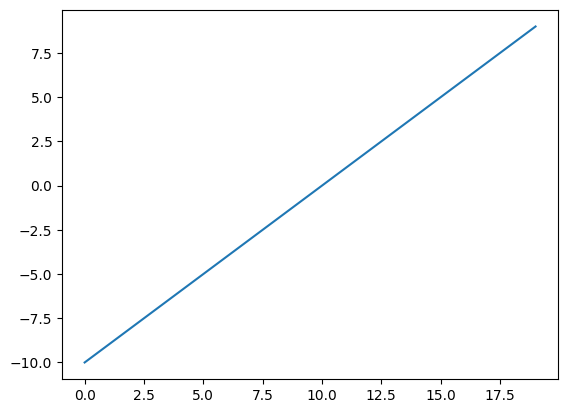

In [66]:
plt.plot(A)

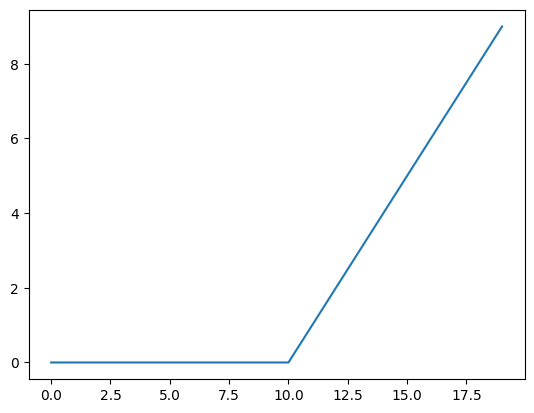

In [67]:
plt.plot(torch.relu(A))

In [68]:
def relu(x:torch.tensor) -> torch.tensor:
  return torch.max(torch.tensor(0),x)

In [69]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

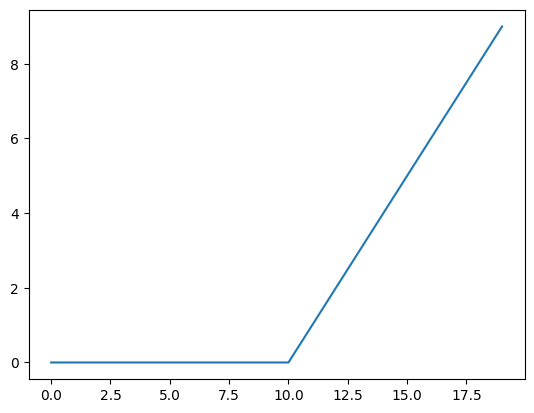

In [70]:
plt.plot(relu(A))

In [71]:
def sigmoid(x:torch.tensor) -> torch.tensor:
  return 1/(1+torch.exp(-x))

In [72]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

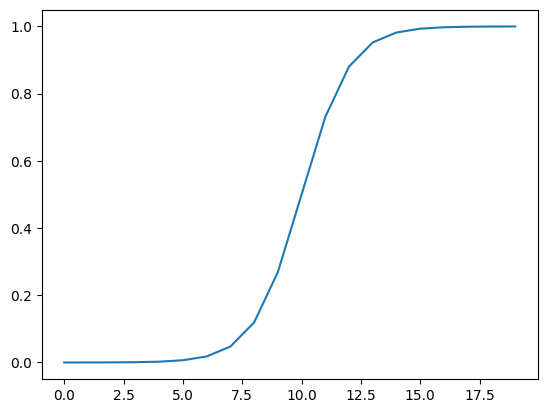

In [73]:
plt.plot(sigmoid(A))

# ***Multiclass Classification***

Creating a toy multiclass dataset


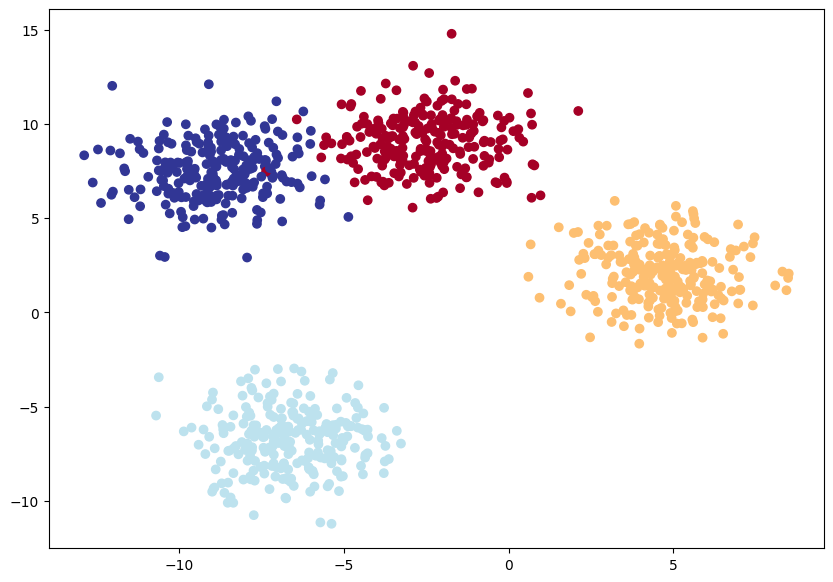

In [74]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn


# set the hyperparameters for data creation

n_classes = 4
n_features = 2
random_seed = 42

# create multiclass data

x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=n_features,
                            centers=n_classes,
                            cluster_std=1.5,
                            random_state=random_seed)

# turn data into tensor

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# train test split

x_blob_train , x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=random_seed)

#plot dataa

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

## Building a multiclass classificaiton model

In [75]:
# Create div agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [76]:
# build a model

class BlobModel(nn.Module):

  def __init__(self,input_features,output_features,hidden_units=8):

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(2,4).to(device)
model_4





BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [77]:
x_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [78]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

In [79]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

In [81]:
model_4.eval()
with torch.inference_mode():
  # Move the input tensor to the same device as the model
  x_blob_test = x_blob_test.to(device)
  y_logits = model_4(x_blob_test)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

y_blob_test,y_pred

(tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
         3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
         1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
         3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
         3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
         3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
         3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
         0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
         2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
         3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
         0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
         2., 1.]),
 tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
         

In [86]:
# create training and testing loop

torch.manual_seed = 42
torch.cuda.manual_seed = 42

x_blob_train = x_blob_train.to(device)
x_blob_test = x_blob_test.to(device)
y_blob_train = y_blob_train.type(torch.LongTensor).to(device)
y_blob_test = y_blob_test.type(torch.LongTensor).to(device)

epochs = 100

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(x_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,
                  y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    y_logits = model_4(x_blob_test)
    y_pred = torch.softmax(y_logits ,dim=1).argmax(dim=1)

    test_loss = loss_fn(y_logits ,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=y_pred)

  if epoch%10==0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}%")


Epoch : 0 | Loss : 0.03185 | Accuracy : 99.12% | Test Loss : 0.02293 | Test Accuracy : 99.50%
Epoch : 10 | Loss : 0.03093 | Accuracy : 99.12% | Test Loss : 0.02186 | Test Accuracy : 99.50%
Epoch : 20 | Loss : 0.03017 | Accuracy : 99.12% | Test Loss : 0.02097 | Test Accuracy : 99.50%
Epoch : 30 | Loss : 0.02955 | Accuracy : 99.12% | Test Loss : 0.02022 | Test Accuracy : 99.50%
Epoch : 40 | Loss : 0.02902 | Accuracy : 99.12% | Test Loss : 0.01958 | Test Accuracy : 99.50%
Epoch : 50 | Loss : 0.02857 | Accuracy : 99.12% | Test Loss : 0.01902 | Test Accuracy : 99.50%
Epoch : 60 | Loss : 0.02819 | Accuracy : 99.12% | Test Loss : 0.01852 | Test Accuracy : 99.50%
Epoch : 70 | Loss : 0.02785 | Accuracy : 99.12% | Test Loss : 0.01809 | Test Accuracy : 99.50%
Epoch : 80 | Loss : 0.02756 | Accuracy : 99.12% | Test Loss : 0.01770 | Test Accuracy : 99.50%
Epoch : 90 | Loss : 0.02730 | Accuracy : 99.12% | Test Loss : 0.01735 | Test Accuracy : 99.50%


## Making pridictions

In [87]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)
  y_pred_probs = torch.softmax(y_logits,dim=1)

y_pred_probs[:10],y_blob_test[:10]

(tensor([[5.0068e-04, 9.9950e-01, 3.9134e-14, 1.6978e-11],
         [9.9218e-04, 6.9581e-13, 1.9327e-04, 9.9881e-01],
         [1.0656e-14, 8.8085e-19, 9.9994e-01, 5.7446e-05],
         [7.0234e-04, 9.9930e-01, 2.1949e-09, 1.4718e-08],
         [9.9717e-01, 2.8277e-03, 1.5099e-12, 6.4343e-07],
         [8.1431e-05, 7.4575e-16, 6.0721e-05, 9.9986e-01],
         [9.2419e-14, 6.2399e-16, 9.9998e-01, 2.4502e-05],
         [9.9971e-01, 6.4487e-05, 2.3274e-09, 2.2269e-04],
         [4.0493e-17, 4.9032e-24, 9.9992e-01, 7.7563e-05],
         [9.9967e-01, 3.0068e-04, 2.3407e-10, 3.1089e-05]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

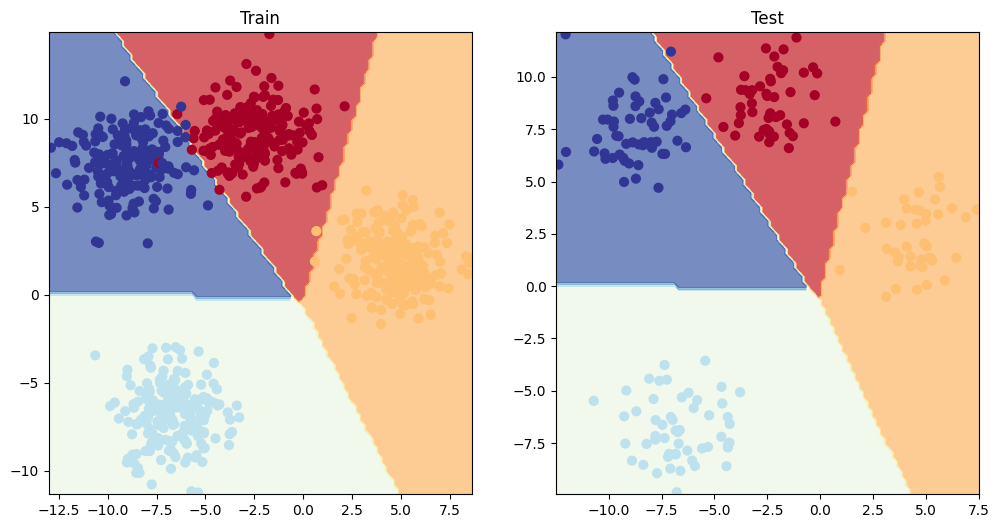

In [88]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,x_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,x_blob_test,y_blob_test)